In [1]:
pip install scikit-learn==1.2.2

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [3]:
data = pd.read_csv('/Users/fathhi/Desktop/ML_CW/heart.csv')

In [69]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


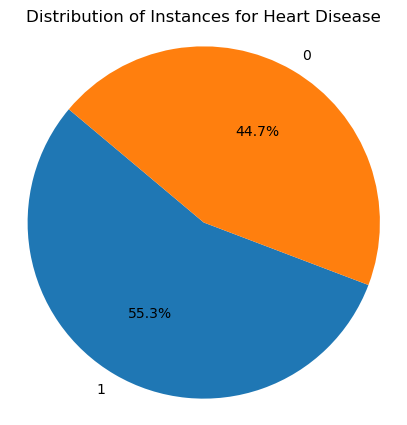

In [71]:
# Count the number of instances for each class
class_counts = data['HeartDisease'].value_counts()

# Get labels and sizes for the pie chart
labels = class_counts.index.tolist()
sizes = class_counts.values.tolist()

# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Instances for Heart Disease')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [5]:
print(data.isna().sum())
print(data.isnull().any())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool


Data is clean, There is No Null Value

In [6]:
data.duplicated().sum()

0

No Duplicate Data found

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## One-hot Encoding Preprocessing Technique

In [17]:
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease']

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

## Implementation of k-nearest neighbors (K-NN) algorithm

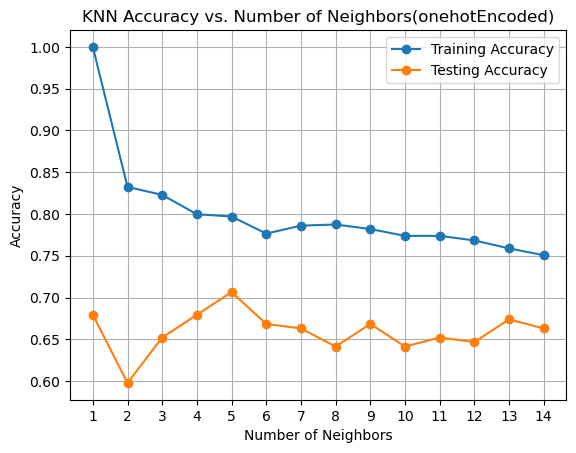

Best value of n_neighbors: 5


In [64]:
train_accuracies = []
test_accuracies = []

# Define a range of values for n_neighbors
neighbors = range(1, 15)  

# Iterate over each value of n_neighbors
for n in neighbors:
    # Initialize and train the KNN model
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train, y_train)
    
    # Make predictions on the training and testing data
    y_train_pred = knn_model.predict(X_train)
    y_test_pred = knn_model.predict(X_test)
    
    # Calculate the training and testing accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append the accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)


plt.plot(neighbors, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(neighbors, test_accuracies, label='Testing Accuracy', marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors(onehotEncoded)')
plt.xticks(neighbors)
plt.legend()
plt.grid(True)
plt.show()

# Find the best value of n_neighbors based on testing accuracy
best_n_neighbors = neighbors[np.argmax(test_accuracies)]
print("Best value of n_neighbors:", best_n_neighbors)

In [47]:
# Initialize and train your KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_model.fit(X_train, y_train)

# Make predictions
y_train_pred_knn = knn_model.predict(X_train)
y_test_pred_knn = knn_model.predict(X_test)

# Calculate accuracy
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)

print("Training Accuracy (knn):", train_accuracy_knn)
print("Testing Accuracy (knn):", test_accuracy_knn)

Training Accuracy (knn): 0.7970027247956403
Testing Accuracy (knn): 0.7065217391304348


## Implementation of Logistic Regression Algorithm

In [24]:
# Initialize and train your Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions for logistic regression
y_train_pred_logreg = logreg_model.predict(X_train)
y_test_pred_logreg = logreg_model.predict(X_test)

# Calculate accuracy for logistic regression
train_accuracy_logreg = accuracy_score(y_train, y_train_pred_logreg)
test_accuracy_logreg = accuracy_score(y_test, y_test_pred_logreg)

print("Training Accuracy (Logistic Regression):", train_accuracy_logreg)
print("Testing Accuracy (Logistic Regression):", test_accuracy_logreg)


Training Accuracy (Logistic Regression): 0.8692098092643051
Testing Accuracy (Logistic Regression): 0.8532608695652174


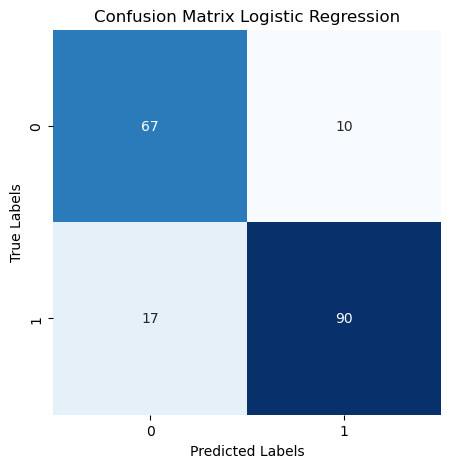

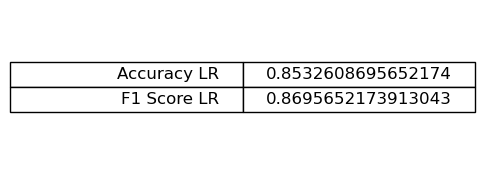

In [63]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_logreg)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_test_pred_logreg)
f1 = f1_score(y_test, y_test_pred_logreg)


# Create a table for accuracy and F1 score
table_data = [["Accuracy LR", accuracy], ["F1 Score LR", f1]]

# Create a subplot for the table
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')  # Hide axes
table = ax.table(cellText=table_data, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)

plt.show()

## Implementation of Support Vector Machine Algorithm

In [38]:
# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100]}

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# Perform grid search cross-validation
grid_search.fit(X_train, y_train)

# Get the best value of C
best_C = grid_search.best_params_['C']

print("Best value of C:", best_C)

Best value of C: 10


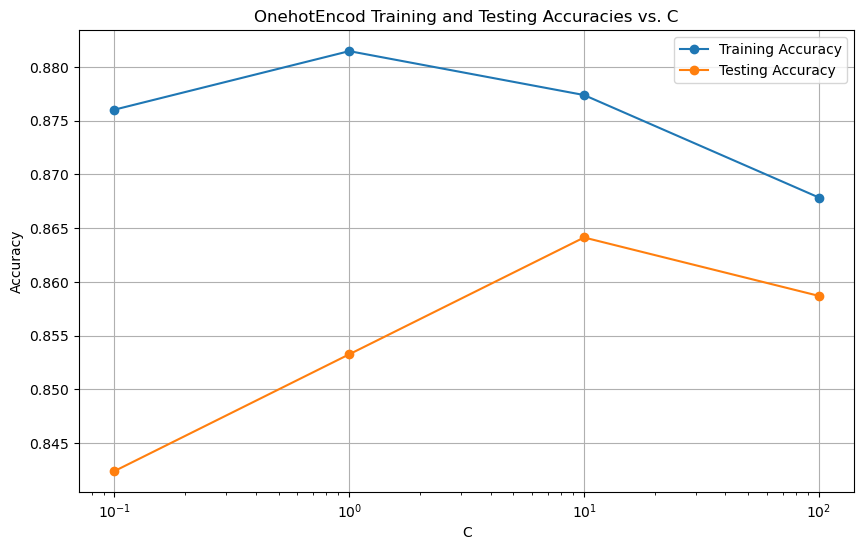

Best value of C based on testing accuracy(onehotEncod): 10


In [60]:
# Define the values of C to explore
C_values = [0.1, 1, 10, 100]

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Iterate over each value of C
for C in C_values:
    # Initialize and train the SVM model
    svm_model = SVC(kernel='linear', C=C, random_state=42)
    svm_model.fit(X_train, y_train)
    
    # Calculate training accuracy
    train_accuracy = svm_model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Calculate testing accuracy
    test_accuracy = svm_model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plot the training and testing accuracies
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(C_values, test_accuracies, marker='o', label='Testing Accuracy')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('OnehotEncod Training and Testing Accuracies vs. C')
plt.legend()
plt.grid(True)
plt.show()

# Get the best value of C based on the testing accuracy
best_C_index = np.argmax(test_accuracies)
best_C = C_values[best_C_index]

print("Best value of C based on testing accuracy(onehotEncod):", best_C)

In [44]:
# Initialize and train your SVM model
svm_model = SVC(kernel='linear', C=10.0, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions for SVM
y_train_pred_svm = svm_model.predict(X_train)
y_test_pred_svm = svm_model.predict(X_test)

# Calculate accuracy for SVM
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)

print("Training Accuracy (SVM):", train_accuracy_svm)
print("Testing Accuracy (SVM):", test_accuracy_svm)

Training Accuracy (SVM): 0.8773841961852861
Testing Accuracy (SVM): 0.8641304347826086


## Implementation of Naive Bayes Algorithm

In [66]:
# Initialize and train your Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Make predictions for Naive Bayes
y_train_pred_nb = naive_bayes_model.predict(X_train)
y_test_pred_nb = naive_bayes_model.predict(X_test)

# Calculate accuracy for Naive Bayes
train_accuracy_nb = accuracy_score(y_train, y_train_pred_nb)
test_accuracy_nb = accuracy_score(y_test, y_test_pred_nb)

print("Training Accuracy (Naive Bayes):", train_accuracy_nb)
print("Testing Accuracy (Naive Bayes):", test_accuracy_nb)

Training Accuracy (Naive Bayes): 0.8583106267029973
Testing Accuracy (Naive Bayes): 0.8641304347826086


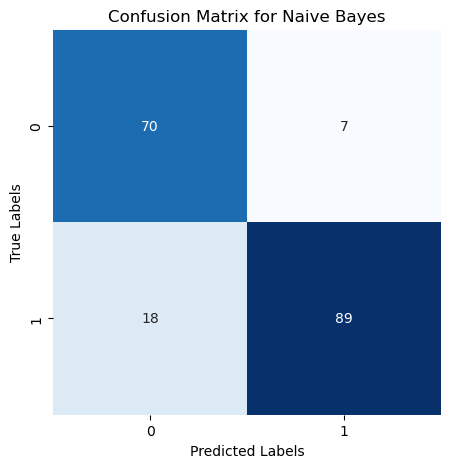

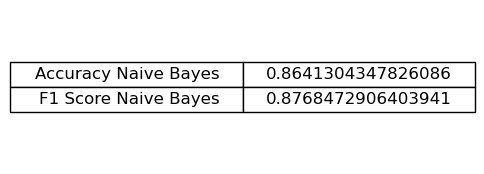

In [67]:
# Calculate confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_test_pred_nb)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

# Calculate accuracy and F1 score
accuracy_nb = accuracy_score(y_test, y_test_pred_nb)
f1_nb = f1_score(y_test, y_test_pred_nb)

# Create a table for accuracy and F1 score
table_data_nb = [["Accuracy Naive Bayes", accuracy_nb], ["F1 Score Naive Bayes", f1_nb]]

# Create a subplot for the table
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')  # Hide axes
table_nb = ax.table(cellText=table_data_nb, loc='center')
table_nb.auto_set_font_size(False)
table_nb.set_fontsize(12)
table_nb.scale(1, 1.5)

plt.show()


In [46]:

# Calculate classification report for SVM
classification_report_svm = classification_report(y_test, y_test_pred_svm)
print("Classification Report (SVM):\n", classification_report_svm)

# Calculate classification report for Naive Bayes
classification_report_nb = classification_report(y_test, y_test_pred_nb)
print("Classification Report (Naive Bayes):\n", classification_report_nb)


Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.82      0.87      0.84        77
           1       0.90      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184

Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.80      0.91      0.85        77
           1       0.93      0.83      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184



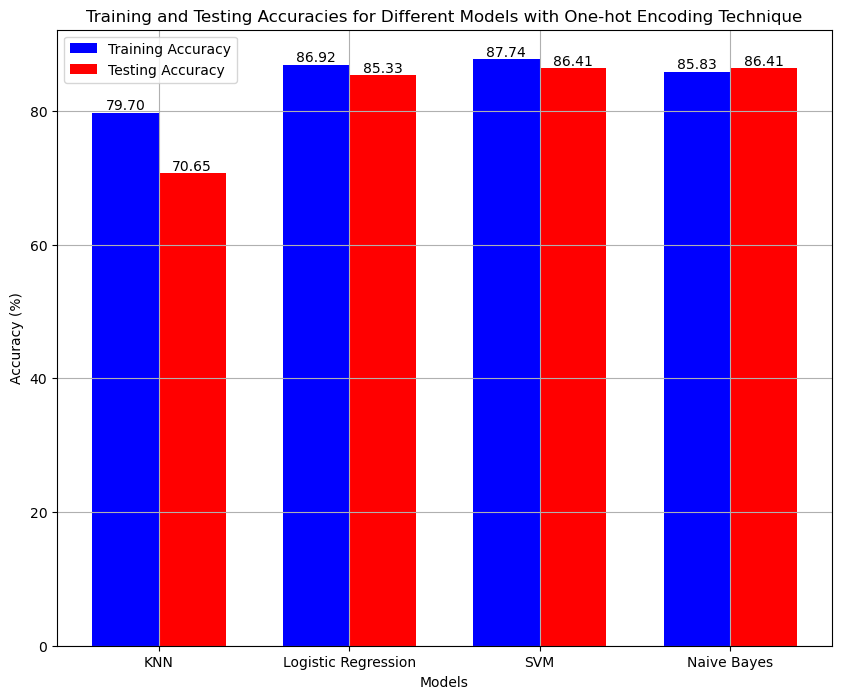

In [58]:
# Initialize the models and their corresponding training and testing accuracies
models = ['KNN', 'Logistic Regression', 'SVM', 'Naive Bayes']
train_accuracies = [train_accuracy_knn, train_accuracy_logreg, train_accuracy_svm, train_accuracy_nb]
test_accuracies = [test_accuracy_knn, test_accuracy_logreg, test_accuracy_svm, test_accuracy_nb]

# Convert accuracies to percentages
train_accuracies_percent = [acc * 100 for acc in train_accuracies]
test_accuracies_percent = [acc * 100 for acc in test_accuracies]

# Plot the training and testing accuracies
plt.figure(figsize=(10, 8))
bar_width = 0.35
index = range(len(models))

# Plot the bars
bars_train = plt.bar(index, train_accuracies_percent, bar_width, label='Training Accuracy', color='b')
bars_test = plt.bar([i + bar_width for i in index], test_accuracies_percent, bar_width, label='Testing Accuracy', color='r')

# Annotate each bar with its corresponding accuracy value
for bars in [bars_train, bars_test]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Training and Testing Accuracies for Different Models with One-hot Encoding Technique')
plt.xticks([i + bar_width/2 for i in index], models)
plt.legend()
plt.grid(True)
plt.show()
